# Project: Investigation of IMDB database

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
The dataset from tmdb will be investigated. This dataset contains information about movies produced in the period 1960-2015. The data describes both the release time, as well as the cast, director and much more. The dataset also contains information about revenue and budgets adjusted to 2010 value. One of the great aspects with this specific dataset is that ratings for the movies have been incorporated. This makes it interesting to investigate how the perception of a movie affects the revenue and also if the rating can be increased by increasing the budget.  
  
The following questions will be investigated in this report:  
- What kind of yearly trends can be found in movie releases?
- Does the size of the budget have an impact on the rating? How is the revenue affected by the rating?
- How is the relationship between budget and revenue? Does it change with time?
- What genre is most popular?

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import numpy as np
%matplotlib inline

#Removing warnings for chained assignments as these have shown to give false warnings: https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas
pd.options.mode.chained_assignment = None  # default='warn'

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [44]:
#Reading in datafile and showing the first few lines
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [45]:
#Investigating data types and missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [46]:
#Rows with missing data
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [47]:
#Checking for duplicates
sum(df.duplicated())

1

In [48]:
#There is a large amount of zero's in the budget column
df['budget_adj'].value_counts()[0]

5696

In [49]:
#There is a large amount of zero's in the revenue column
df['revenue_adj'].value_counts()[0]

6016

The dataset has been loaded using pandas csv reader and the first few lines of the .csv file can be seen.  
The datatypes and missing values have been investigated and lastly one duplicate row was found.

### Data Cleaning 

#### Unnecessary data 
Some columns will be taken out of the dataset:
- The *imdb_id* is not necessary as there already is an id column in the dataset
- _homepage_, _tagline_ and _overview_ all poses a lot of text that will be tricky to do data analysis on
- _budget_ and _revenue_ as these will be substituted with the 2010 adjusted columns so all values are compared on the same terms

#### Data types
Several of the data types are stored as objects. Most of them are strings so that is fine. However the *release_date* is also stored as an object and needs to be converted into datetime. The *release_year* is also part of the dataset as an int64 which could prove high enough resolution for any data analysis done on release dates.

#### Missing values
The columns *cast*, *director*, *keywords*, *genres* and *production_companies* all have empty cells in their data. Below is a count:   
- *cast*                      76  
- *director*                  44  
- *keywords*                1493  
- *genres*                    23  
- *production_companies*    1030  

All rows with missing data are taken out from the dataset to ensure overall consistency in the data analysis.

Furthermore, a large amount of movies does not have information about their budget and revenue and in the dataset this shows as a large amount of zero's in the data. 
The amount of zero's in the columns:  
- *budget_adj* 5696
- *revenue_adj* 6016

In this analysis these rows will be removed, as there is a great variation in the data. A method of estimating values could be established, but due to the amount of available parameters, e.g. cast, directors, year of release etc. it is deemed impossible to estimate trustworthy numbers.

#### Duplicates
1 duplicate row was found which will be removed

#### Data preparation for analysis
To do data analysis on the genres of the movies, only the firstly mentioned genre in the column *genres* will be used to simplify the investigation. This could introduce some uncertainty into the analysis, but the usual syntax of listing movie genres is listing the most fitting first. 



In [50]:
#Removing some unnecessary columns for this analysis as described earlier
df2 = df.iloc[:, np.r_[0,2,5:7,8,10,12:21]] 
df2.head()
#df2.info()

,id,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [51]:
#Conversion from object to datetime
df2['release_date'] = pd.to_datetime(df2['release_date']) 
df2.iloc[:10,9]
#df2.head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
5   2015-12-25
6   2015-06-23
7   2015-09-30
8   2015-06-17
9   2015-06-09
Name: release_date, dtype: datetime64[ns]

In [52]:
#Removing rows with Null values
df2.dropna(inplace=True)

In [53]:
#Removing all the zero values in budget_adj and revenue_adj
df2 = df2[df2.budget_adj != 0]              #https://stackoverflow.com/questions/18172851/deleting-dataframe-row-in-pandas-based-on-column-value
df2 = df2[df2.revenue_adj != 0]
#df2['revenue_adj'].value_counts()

In [54]:
#Removal of duplicates
df2.drop_duplicates(inplace=True)

In [55]:
#Reads all the genres and overwrites with only the first one mentioned
df2.iloc[:,7] = df2.iloc[:,7].str.split('|', expand = True)[0]
df2.head()

,id,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


<a id='eda'></a>
## Exploratory Data Analysis


### Exploratory data overview
Below is a scatter plot of all the numerical variables that have been selected to progress to this step

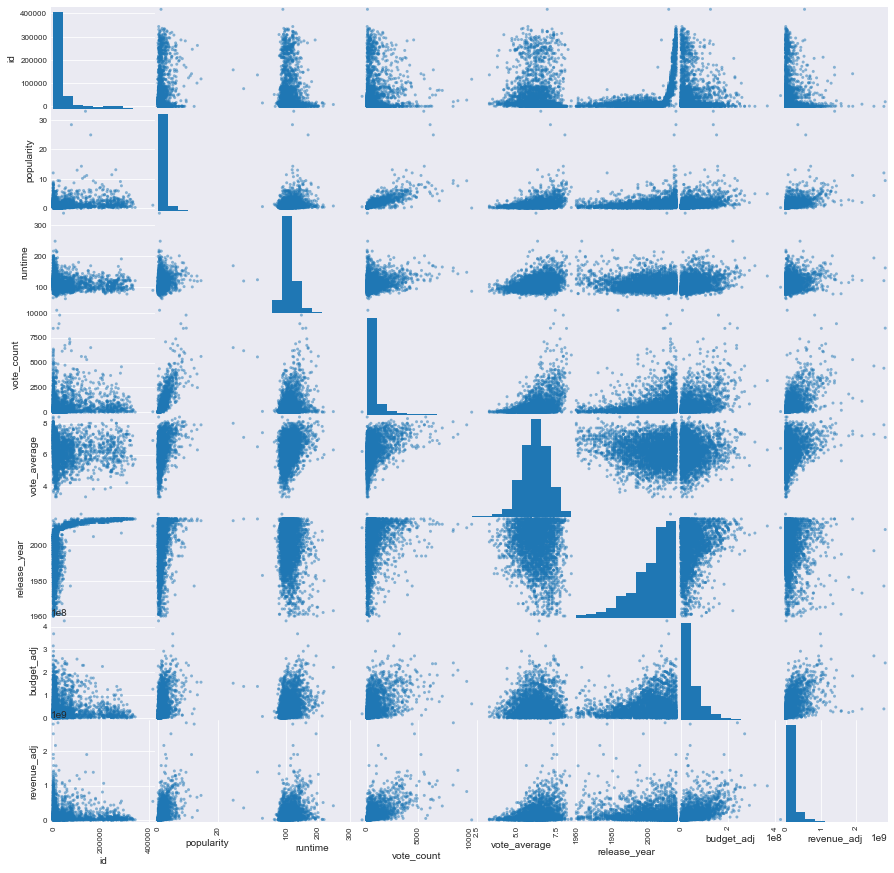

In [56]:
#Plotting all the numerical variables against each other
pd.plotting.scatter_matrix(df2.iloc[:,np.r_[0:2,6,7:15]],figsize=(15,15));

These scatter plots provides an overview of the dependability and relations between the variables.
To further show the information available on this dataset is an overall statistics description of the dataset below here.

In [57]:
#Statistical information on the dataset
df2.describe()

,id,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3677.000000,3677.000000,3677.000000,3677.000000,3677.000000,3677.000000,3.677000e+03,3.677000e+03
mean,39224.526244,1.226051,109.561327,547.702203,6.182758,2001.091923,4.538793e+07,1.420888e+08
std,67249.633137,1.498897,19.855075,894.954704,0.789610,11.380391,4.519195e+07,2.195158e+08
min,5.000000,0.010335,26.000000,10.000000,2.200000,1960.000000,9.693980e-01,2.861934e+00
25%,5470.000000,0.481276,96.000000,78.000000,5.700000,1995.000000,1.381637e+07,2.041316e+07
50%,11017.000000,0.830597,106.000000,219.000000,6.200000,2004.000000,3.108049e+07,6.550727e+07
75%,37958.000000,1.411147,120.000000,596.000000,6.700000,2010.000000,6.216097e+07,1.704399e+08
max,417859.000000,32.985763,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


An important variable to notice in this statistics overview, is the *release_year* variable. Even though the dataset goes from 1960-2015 (55 years), the 25% quartile says *1995*. So 25% of all the movie releases in this dataset occured in the first 35 years whereas 75% of them occured in the last 20 years. This means the movie population is very limited in the early years and could give cause for some big fluctuations when doing analysis in these early years.

In [58]:
# plotting function
def plot_fct(data,plot_ty,xla,yla,tit):
    data.plot(kind=plot_ty);
    plt.xlabel(xla,fontsize = 18);
    plt.ylabel(yla,fontsize = 18);
    plt.title(tit, fontsize = 18);
# plotting function with limits and binwidth
def plot_bin(data,plot_ty,xla,yla,tit,xlim1,xlim2,binwidth):
    data.plot(kind=plot_ty,bins=range(xlim1, xlim2 + binwidth, binwidth));
    plt.xlabel(xla,fontsize = 18);
    plt.ylabel(yla,fontsize = 18);
    plt.title(tit, fontsize = 18);
    plt.xlim(xlim1,xlim2)
# scatter function
def plot_scatter(x_data,y_data,xla,yla,tit):
    plt.scatter(x_data,y_data);
    plt.xlabel(xla,fontsize = 18);
    plt.ylabel(yla,fontsize = 18);
    plt.title(tit, fontsize = 18);


[0.010334999999999999, 32.985762999999999]

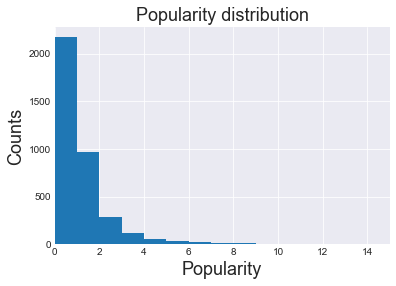

In [59]:
#Plotting the popularity distribution and finding the min and max value
plot_bin(df2['popularity'],'hist','Popularity','Counts','Popularity distribution',0,15,1)
[min(df2['popularity']),max(df2['popularity'])]

The range of the *popularity* distribution is from 0.01 to 32.99. It has a high count from 0-2 and then quickly falls off.

[26, 338]

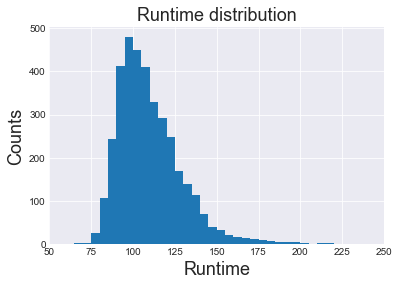

In [60]:
#Plotting the runtime distribution and finding the min and max value
plot_bin(df2['runtime'],'hist','Runtime','Counts','Runtime distribution',50,250,5)
[min(df2['runtime']),max(df2['runtime'])]

The range of the *runtime* distribution is from 26 minutes to 338 minutes. It is a positively skewed normal distribution, with a mean value of 109.6 minutes.

[10, 9767]

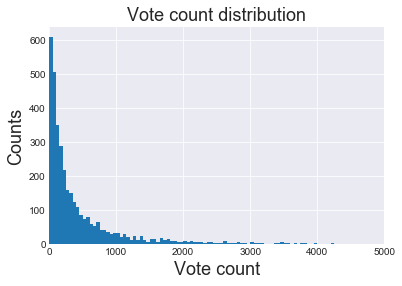

In [61]:
#Plotting the vote_count distribution and finding the min and max value
plot_bin(df2['vote_count'],'hist','Vote count','Counts','Vote count distribution',0,5000,50)
[min(df2['vote_count']),max(df2['vote_count'])]

The range of the *vote_count* distribution is from 10 to 9767. The mean amount of votes on a movie is 547.7 votes and the median is 219 votes. So this graph is positively skewed.

[2.2000000000000002, 8.4000000000000004]

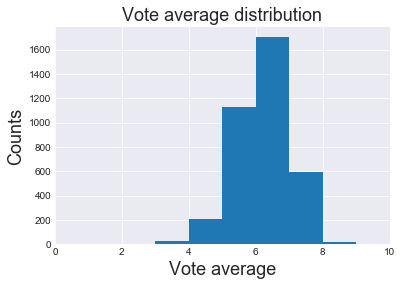

In [62]:
#Plotting the vote_average distribution and finding the min and max value
plot_bin(df2['vote_average'],'hist','Vote average','Counts','Vote average distribution',0,10,1)
[min(df2['vote_average']),max(df2['vote_average'])]

The range of the *vote_average* distribution is from 2.2 to 8.4. It is a normal distribution, with a mean value of 6.18 and a median of 6.20.

[1960, 2015]

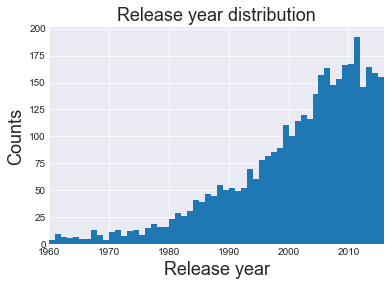

In [63]:
#Plotting the release_year distribution and finding the min and max value
plot_bin(df2['release_year'],'hist','Release year','Counts','Release year distribution',1960,2016,1)
[min(df2['release_year']),max(df2['release_year'])]

The range of *release_year* is from 1960 to 2015 and is increasing from 1960 to 2006, whereafter it seems to flatten out, with the exception of a single peak. The mean year is 2001 and the median year is 2004, which makes it negatively skewed.

[0.96939804259147211, 425000000.0]

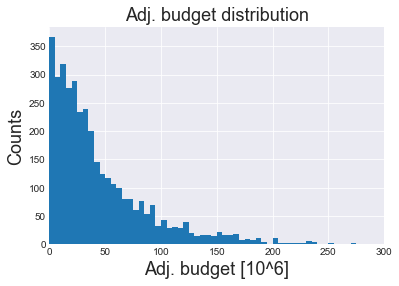

In [64]:
#Plotting the budget_adj distribution and finding the min and max value
plot_bin(df2['budget_adj']/1000000,'hist','Adj. budget [10^6]','Counts','Adj. budget distribution',0,300,5)
[min(df2['budget_adj']),max(df2['budget_adj'])]

The range of *budget_adj* is from 0.96 to 425$*10^6$ dollars. 

[2.8619337342139302, 2827123750.41189]

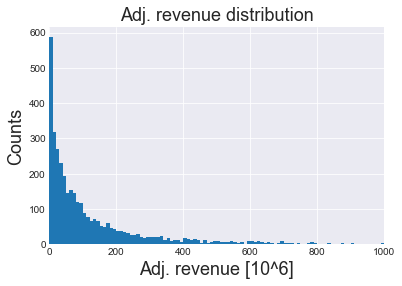

In [65]:
#Plotting the revenue_adj distribution and finding the min and max value
plot_bin(df2['revenue_adj']/1000000,'hist','Adj. revenue [10^6]','Counts','Adj. revenue distribution',0,1000,10)
[min(df2['revenue_adj']),max(df2['revenue_adj'])]

The range of *revenue_Adj* is from 2.9 to 2.83$*10^9$ dollars. 

### What kind of yearly trends can be found in movie releases?

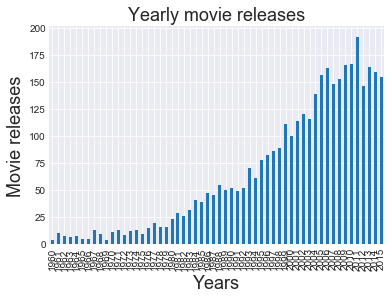

In [66]:
#Sorting the dataset on release year and then counting the amounts of releases each year
years = df2['release_year'].value_counts().sort_index()
plot_fct(years,'bar','Years','Movie releases','Yearly movie releases')

From this database it seems that more and more movies being released. There is no information available on the limitations of this database, so it will most likely not be containing every single published movie in the world, but the trend can be still used to get an idea of the tendency.  
The trend was very increasing up untill 2006, but after 2006 there was a decline. 2011 is the peak year, but it seems that the trend is decreasing again.  
No conclusions can be made on this, as there have been a great deal of data eliminated and this information should just be seen as a trend indication instead of an absolute measure.

109.56132716888769

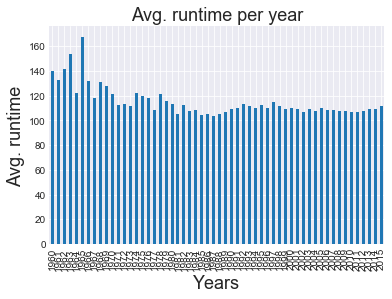

In [67]:
#Sorting the dataset on release year and then averaging the runtime each year
run = df2.groupby('release_year').runtime.mean().sort_index()
plot_fct(run,'bar','Years','Avg. runtime','Avg. runtime per year')
df2['runtime'].mean()

The general yearly trend for runtime seems to be decreasing from 1960-1985. From 1985 and onwards it is more steady with some smaller fluctuations. The average runtime for the entire dataset is 109.6 minutes.

6.182757682893663

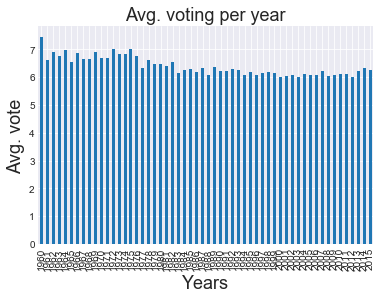

In [68]:
#Sorting the dataset on release year and then averaging the votes each year
vote = df2.groupby('release_year').vote_average.mean().sort_index()
plot_fct(vote,'bar','Years','Avg. vote','Avg. voting per year')
df2['vote_average'].mean()

The question here could be: "Does movies tend to get better or worse with time?". 
The voting average is high and fluctuating around 6.5-7 in the years 1960-1975. From 1975 and onwards the overall trend drops steadily and seems to be fluctuating around 6-6.3. The overall average vote for all years is 6.2.  
Based on this presentation here, it seems that movies were actually better back in the old days.  
Of course, it is not possible to make a definite conclusion on this, as the dataset might only contain parts of the movies released back then and some sorting has taken place. In a previous figure it was shown that the population of movies are increasing with time, which makes it more likely to see deviations in the voting average for the early years.

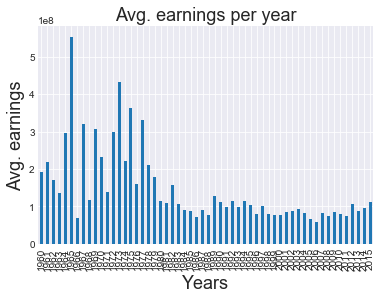

In [69]:
#Sorting the dataset on release year and then averaging the budget and revenue from each year
bud = df2.groupby('release_year').budget_adj.mean().sort_index()
rev = df2.groupby('release_year').revenue_adj.mean().sort_index()
#From these averaged numbers, the earnings are calculated and plotted yearwise
diff = rev-bud
plot_fct(diff,'bar','Years','Avg. earnings','Avg. earnings per year')

The average earnings per year have been plotted, and from 1960-1980 some very large fluctuations occur. This is most likely due to the limited population of movies from the early years.  
It seems that the earnings were much bigger in the period 1960-1980 and that after 1980 the earnings became more stabilized as the population of movies increases. 

### Does the size of the budget have an impact on the rating? How is the revenue affected by the rating?

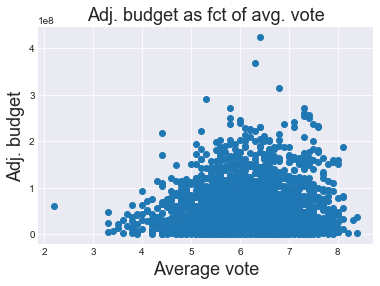

In [70]:
#Plotting adj. budget against the average vote
plot_scatter(df2['vote_average'],df2['budget_adj'],'Average vote','Adj. budget','Adj. budget as fct of avg. vote')

The budget plotted together with the votes forms a normal distribution with a negative skew. Interestingly, it seems that a higher budget does not guarantee a higher rating. 

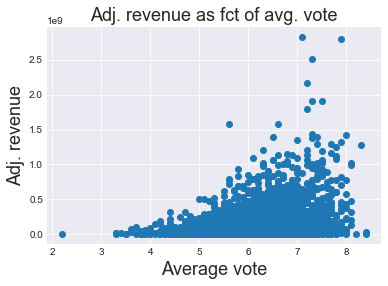

In [71]:
#Plotting adj. revenue against the average vote
plot_scatter(df2['vote_average'],df2['revenue_adj'],'Average vote','Adj. revenue','Adj. revenue as fct of avg. vote')

The revenue is also forming a normal distribution that seems to be even more negatively skewed than the budget.  
The revenue seems to be highly dependent on the voting. In order to get a high revenue it seems that you need a high vote.



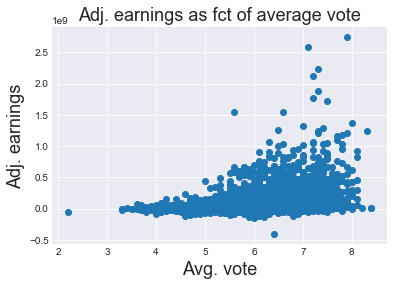

In [72]:
#Computing the earnings and then plotting it against the average vote
earnings = df2['revenue_adj']-df2['budget_adj']
plot_scatter(df2['vote_average'],earnings,'Avg. vote','Adj. earnings','Adj. earnings as fct of average vote')

This negatively skewed normal distribution is showing again.  
From this dataset, it seems that most of the movies earns money and it seems to be a highly increasing trend for high ratings. This dataset show that a high rating is more likely to give higher earnings.

### How is the relationship between budget and revenue? Does it change with time?

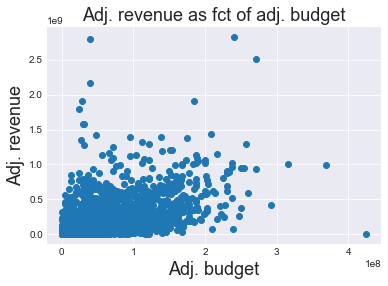

In [73]:
#Plotting adj. revenue against the adj. budget
plot_scatter(df2['budget_adj'],df2['revenue_adj'],'Adj. budget','Adj. revenue','Adj. revenue as fct of adj. budget')

Seemingly there is no clear correlation between revenue and budget. There could be a tendency for a positive correlation with an increasing trend line.


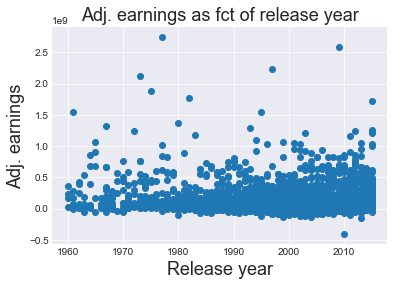

In [74]:
#Plotting adj. earnings, which was computed before against the release year
plot_scatter(df2['release_year'],earnings,'Release year','Adj. earnings','Adj. earnings as fct of release year')

In the plot above are the adjusted earnings shown together with the release year. There seems to be a positive trend, which means that generally movies are earning more and more. Furthermore, it seems that the dataset also shows a less clearly negative trend for movies with negative earnings. It could seem that the movies loosing money also are loosing more on newer movies.

### What genre is most popular?

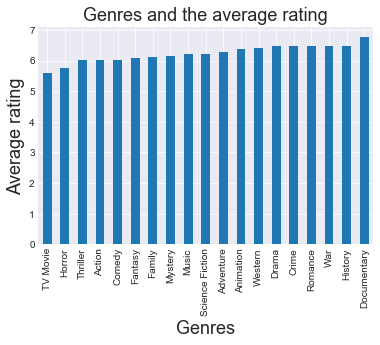

In [75]:
#Sorting the dataset on genres and then averaging the votes for each genre
genre_rating = df2.groupby('genres').vote_average.mean().sort_values()
plot_fct(genre_rating,'bar','Genres','Average rating','Genres and the average rating')

The plot above shows the genres and the average rating they get. In this analysis, only the firstly mentioned genre in the data have been used, which of course introduces some uncertainty into the data used. Most databases about movies will have the genres listed in order, so the most fitting is mentioned first.
From this analysis, *Documentaries* seems to receive the highest average ratings followed by *History*. *TV Movie* and then *Horror* gets the lowest.

<a id='conclusions'></a>
## Conclusions
This report has investigated the movie database from tmdb. After some data wrangling, several issues were found with the dataset. The data contained a large amount of Null values that was removed and furthermore it was discovered that a great amount of the movies lacked budget and revenue data. Instead of Null values a zero have been used, which was not caught by the Null investigation. These rows together with one duplicate row were also removed.  

Several questions have been investigated in this report. As the extent of the movie database is unknown and due to the heavy removal of data from the original file it is hard to make any firm conclusions based on this investigation. General trends have been analysed and they could be an indicator of the truth, but at this point they will remain as indicators.

First it was shown that the amount of movie releases have increased greatly since 1960, but surprisingly the runtime, average vote and earnings of the movies have actually declined. As shown in the movie releases per year plot, the population of movies in the period 1960-1980 is very limited and this has a big influence on the fluctuations in this investigation.  

Then was the budget and revenue versus voting average looked into. Surprisingly, the budget and revenue forms negatively skewed normal distributions when plotted against the voting average. So from this investigation there is no clear evidence that having a large budget necessarily will give you a high rating. Furthermore it was shown that with the data analysed the revenue and earnings are very dependent on the average voting given.  

Lastly the popularity of the different genres were looked into. To do this analysis, only the firstly mentioned genre in the dataset was used for the analysis. This introduces some uncertainty, but the usual syntax for listing movie genres, is listing the most fitting first. The result found in this analysis, shows that *Documentaries* receives the highest voting average while *TV Movies* receives the lowest.